<IPython.core.display.Javascript object>


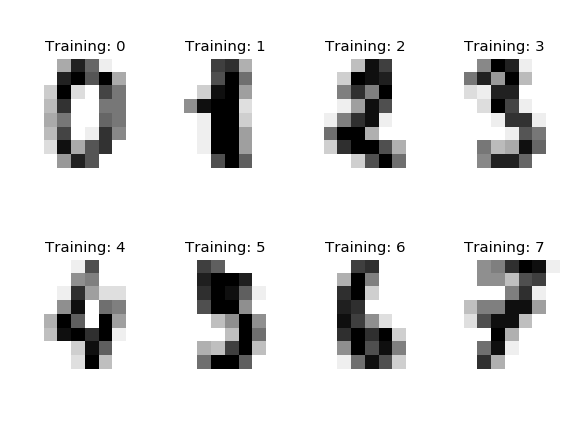

In [5]:
%matplotlib notebook
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
fig = plt.figure()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    ax = fig.add_subplot(2,4,index+1)
    ax.axis('off')
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Training: {label}")
plt.tight_layout()
plt.show()

(1797, 64)
(1797,)
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.95      0.90      0.93        91
           2       1.00      0.94      0.97        86
           3       0.95      0.87      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.96      0.93        91
           6       0.99      0.99      0.99        91
           7       0.92      0.98      0.95        89
           8       0.92      0.89      0.90        88
           9       0.83      0.95      0.88        92

   micro avg       0.94      0.94      0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg  

<IPython.core.display.Javascript object>


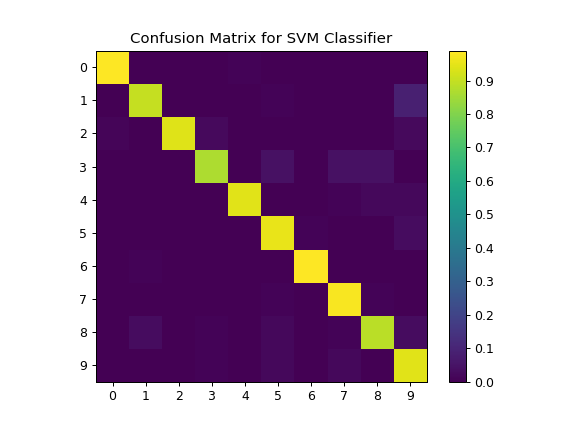

In [9]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)
print(digits.target.shape)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.0001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

cm = metrics.confusion_matrix(expected, predicted)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')
ax.set_xticks([i for i in range(10)])
ax.set_xticklabels([i for i in range(10)])
ax.set_yticks([i for i in range(10)])
ax.set_yticklabels([i for i in range(10)])
ax.set_title("Confusion Matrix for SVM Classifier")

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])
plt.show()

<IPython.core.display.Javascript object>


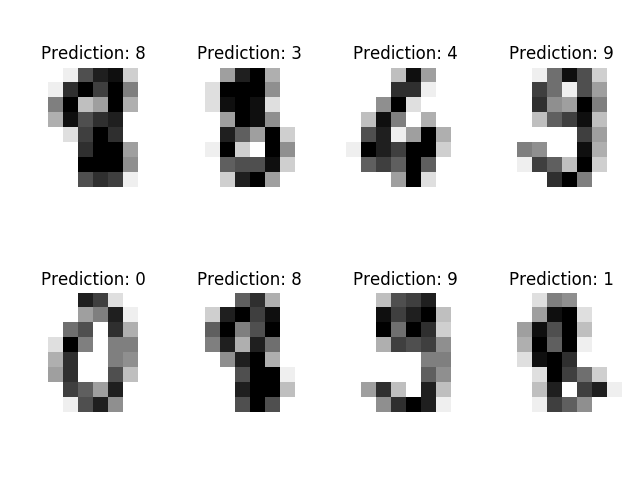

In [11]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
fig = plt.figure()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_predictions[:8]):
    ax = fig.add_subplot(2,4,index+1)
    ax.axis('off')
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Prediction: {label}")
plt.tight_layout()
plt.show()

In [4]:
# The keras version of the dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
# cast to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# normalize inputs
X_train /= 255
X_test /= 255

Using TensorFlow backend.


In [5]:
classifier = svm.SVC(gamma=0.001, kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print(score)
cm = metrics.confusion_matrix(y_test, y_pred)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % cm)

KeyboardInterrupt: 

In [ ]:
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm_norm, interpolation='nearest')
ax.set_xticks([i for i in range(10)])
ax.set_xticklabels([i for i in range(10)])
ax.set_yticks([i for i in range(10)])
ax.set_yticklabels([i for i in range(10)])
ax.set_title("Confusion Matrix for SVM Classifier")

cbar = fig.colorbar(cax, ticks=[i for i in np.arange(0, 1, 0.1)])
plt.show()

# To Do:

- Adjust SVM hyper parameters